___
<a href='http://www.1mustlearn.com/hk'> <img src='http://www.1mustlearn.com/wp-content/uploads/2019/07/thumb_color1-1.png' /></a>
___
<a href='https://www.youtube.com/channel/UCHcFAw2lKTuHZ04-2xlaPyQ'> <img src='http://www.1mustlearn.com/wp-content/uploads/2019/10/images.png' /></a>
___
<a href='https://www.facebook.com/1MustLearn/'> <img src='http://www.1mustlearn.com/wp-content/uploads/2019/10/facebook-icon.png' /></a>
___
# 股票分析項目 - 答案

歡迎來到您的第一個頂點項目！ 這個項目旨在課程的前半部分，主要是學習我們在本課程中使用的library，課程的後半部分將涉及更多定量交易技術。

從2014年4月1日到2018年9月28日，我們將分析幾家科技公司相關的股票數據。請記住，這個項目主要是用matplotlib，pandas和numpy來練習你的技能。 不要從我們在這裡做的分析推斷投資交易建議！


### 導入

** 導入您需要的各種library - 您可以隨時返回此處或隨著時間導入 **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## 第1部分：獲取數據

### Google股票（股票代碼：GOOG）

**  *注意！不是每個人的電腦，都允許他們使用pandas_datareader自由下載股票資訊（防火牆、管理員許可權等）。正因為如此，谷歌的CSV檔案會提供給您。檔案為Google.csv。請隨意使用read_csv！ **

** 使用pandas_datareader從2014年4月1日到2018年9月28日獲取谷歌的歷史股票信息。**



In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2014, 4, 1)
end = datetime.datetime(2018, 9, 28)
goog = web.DataReader("GOOG", 'iex', start, end,)

5y


In [5]:
goog.head()

,open,high,low,close,volume
date,,,,,
2014-04-01,558.710,568.45,558.71,567.16,7932
2014-04-02,565.106,604.83,562.19,567.00,146697
2014-04-03,569.850,587.28,564.13,569.74,5087530
2014-04-04,574.650,577.77,543.00,543.14,6377658
2014-04-07,540.740,548.48,527.15,538.15,4389569


In [6]:
# 要把 date index 轉為 datetime object, 否則繪圖時，日期無法顯示出來 (您可以嘗試不加這句，然後看一下是怎樣)
goog.index = pd.to_datetime(goog.index)

### 其他科技公司

** 重複相同的步驟來獲取Apple(AAPL)和Facebook(FB)的數據 **

In [7]:
aapl = web.DataReader("AAPL", 'iex', start, end)
fb = web.DataReader("FB",'iex',start,end)

# 要把 date index 轉為 datetime object, 否則繪圖時，日期無法顯示出來 (您可以嘗試不加這句，然後看一下是怎樣)
aapl.index = pd.to_datetime(aapl.index)
fb.index = pd.to_datetime(fb.index)

5y
5y


In [8]:
aapl.head()

,open,high,low,close,volume
date,,,,,
2014-04-01,70.9280,71.4701,70.7974,71.4410,50189685
2014-04-02,71.5373,71.6824,71.2577,71.5597,44792195
2014-04-03,71.4067,71.5532,70.9121,71.0638,40648111
2014-04-04,71.1984,71.2234,69.9810,70.1445,68812485
2014-04-07,69.6433,70.0232,68.8348,69.0432,72462530


In [9]:
fb.head()

,open,high,low,close,volume
date,,,,,
2014-04-01,60.46,62.66,60.24,62.620,59291210
2014-04-02,63.21,63.91,62.21,62.720,66144812
2014-04-03,62.55,63.17,59.13,59.490,83859330
2014-04-04,59.94,60.20,56.32,56.749,125465774
2014-04-07,55.90,58.00,55.44,56.950,108487569


## 第2部分：數據視覺化

** 是時候視覺化數據了 **

** 按照說明和解釋繼續並重新創建下面的圖表。 **

____

** 重新創建所有股票開盤價的線性圖！ 提示：對於圖例，使用label參數和plt.legend（）**

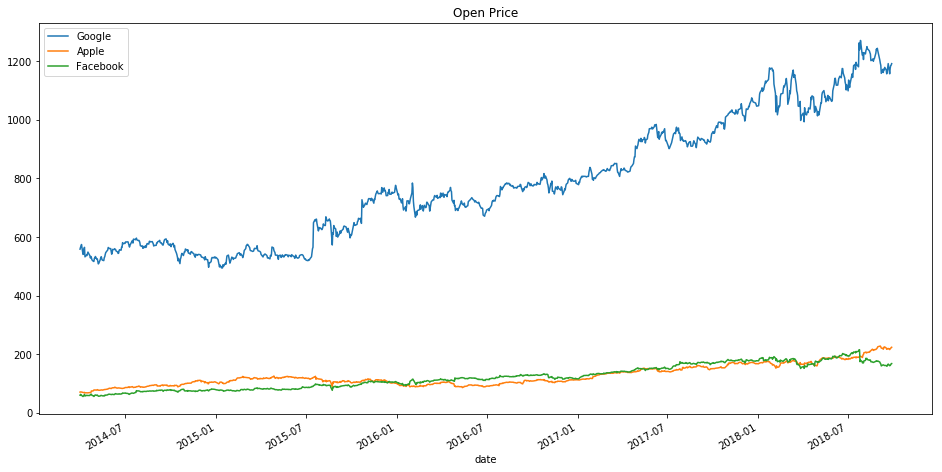

In [10]:
goog['open'].plot(label='Google',figsize=(16,8),title='Open Price')
aapl['open'].plot(label='Apple')
fb['open'].plot(label='Facebook')
plt.legend()

____

** 繪製每天股票的交易量。**

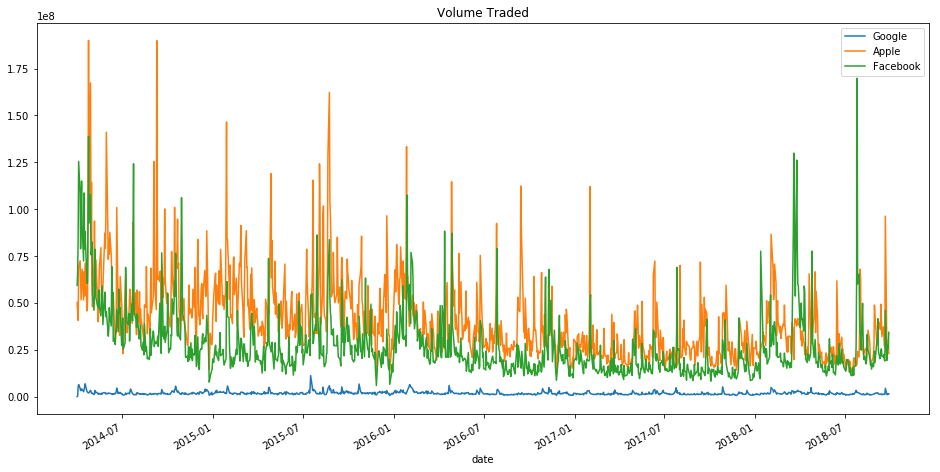

In [11]:
goog['volume'].plot(label='Google',figsize=(16,8),title='Volume Traded')
aapl['volume'].plot(label='Apple')
fb['volume'].plot(label='Facebook')
plt.legend()

** 看起來Facebook在2018年中的某個地方出現了一次非常大的飆升。Facebook這個最大交易量日期是什麼時候？**

In [12]:
fb['volume'].idxmax()

Timestamp('2018-07-26 00:00:00')

____

** 開市價格時間序列圖像使Google看起來比Apple和Facebook更有價值。 但要真正理解這一點，我們需要考慮公司的總市值，而不僅僅是股票價格。 不幸的是，我們目前的數據沒有存在的總存量單位的信息。 但是，我們可以做的一個簡單的計算方法是嘗試代表交易的總交易金額，那就是將Volume列乘以Open價格，這仍然不是實際的市值，它只是使用時間序列交易總金額的直觀顯示。 **

** 為每個數據框創建一個名為“Total Traded”的新列，即開盤價乘以交易量。**

In [13]:
goog['Total Traded'] = goog['open']*goog['volume']
aapl['Total Traded'] = aapl['open']*aapl['volume']
fb['Total Traded'] = fb['open']*fb['volume']

** 繪製這個“總交易”的時間索引。**

Text(0,0.5,'Total Traded')

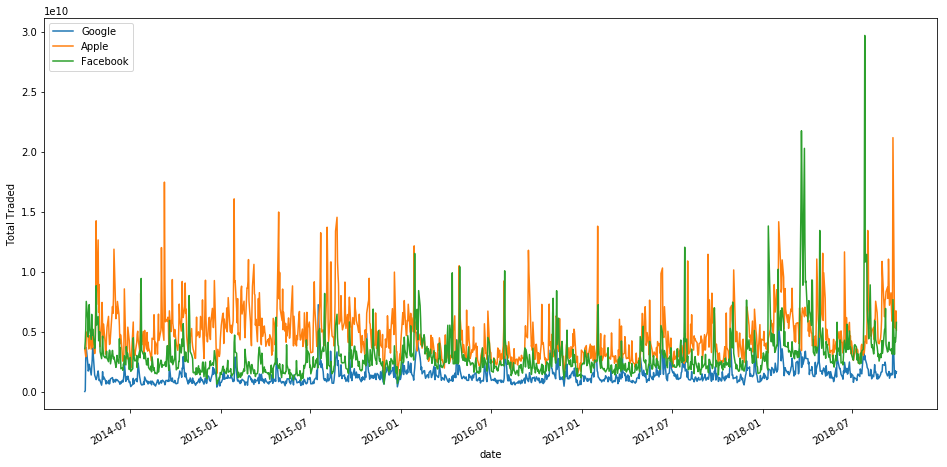

In [14]:
goog['Total Traded'].plot(label='Google',figsize=(16,8))
aapl['Total Traded'].plot(label='Apple')
fb['Total Traded'].plot(label='Facebook')
plt.legend()
plt.ylabel('Total Traded')

** 有趣的是，看起來Apple在2018中年有大量的資金交易。這是什麼日期？ **

In [15]:
aapl['Total Traded'].idxmax()

Timestamp('2018-09-21 00:00:00')

____

** 讓我們練習繪製一些移動平均線。為Apple繪製MA50和MA200。(用開盤價) **

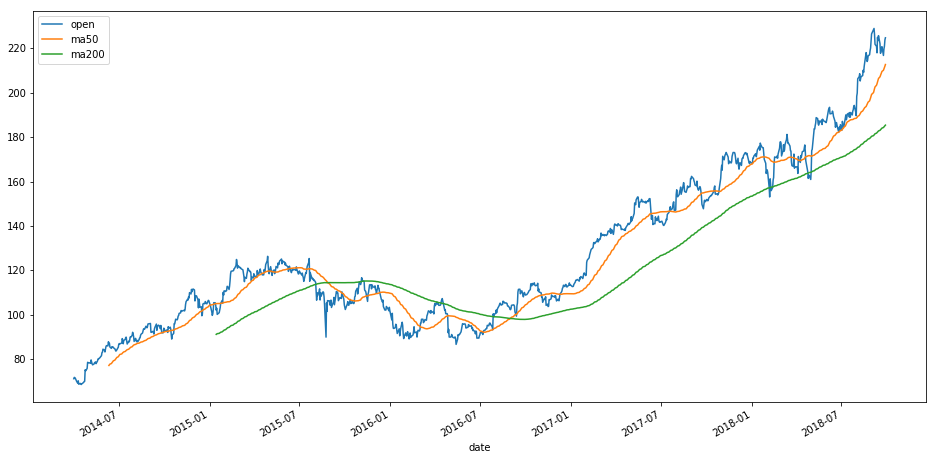

In [16]:
aapl['ma50'] = aapl['open'].rolling(50).mean()
aapl['ma200'] = aapl['open'].rolling(200).mean()
aapl[['open','ma50','ma200']].plot(label='Apple',figsize=(16,8))

______

** 最後讓我們看看這些股票之間是否存在關係，畢竟它們都與科技行業有關。 我們可以通過散點矩陣圖輕鬆地看到這一點。 從pandas.plotting導入scatter_matrix並使用它創建所有股票開盤價的散點圖矩陣。 你可能需要將列重新排列為新的單個數據幀。 提示和信息可以在這裡找到： https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
tech_comp = pd.concat([goog['open'],aapl['open'],fb['open']],axis=1)

In [19]:
tech_comp.columns = ['Google Open','Apple Open','Facebook Open']

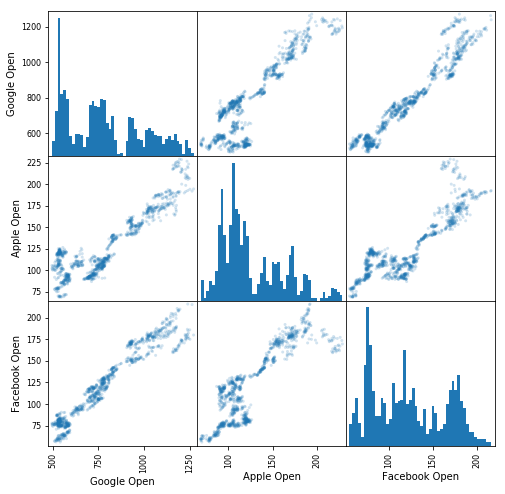

In [20]:
scatter_matrix(tech_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

____
# 第3部分：基本財務分析

現在是時候專注於一些關鍵的財務計算。 這將為你過渡課程的下半部分。 你需要做的就是按照說明進行操作，這主要是使用python和pandas將數學方程式或概念轉換為代碼的練習，這是我們在處理量化數據時經常做的事情！ 如果你在這部分覺得有點難，不要擔心！ 只需參考解決方案並將其當作為代碼課，使用任何最適合你的學習方式！

讓我們開始！
____

## 每日百分比變化
首先，我們將從計算每日百分比變化開始。 每日百分比變化由以下公式定義：

$ r_t = \frac{p_t}{p_{t-1}} -1$

這將 $ r_t$（在時間t返回）定義為等於時間 t 處的價格除以時間 t-1（前一天）的價格減去1。基本上這只是告訴您如果您當天購買股票然後第二天賣掉的百分比增益（或損失） 。 雖然這不一定有助於預測股票的未來價值，但它對分析股票的波動性非常有幫助。 如果每日回報分佈廣泛，則股票從一天到下一天有更大的波動性。 讓我們計算百分比回報，然後用直方圖繪製，並確定哪個股票最穩定！

** 為每個數據幀創建一個新列名為returns。 此列將從"close"列計算。 有兩種方法可以做到這一點，使用上面公式的.shift（）方法進行簡單計算，或者可以使用pandas內置的pct_change方法。 **

In [21]:
# 方法 1：使用shift
goog['returns'] = (goog['close'] / goog['close'].shift(1) ) - 1

In [22]:
goog.head()

,open,high,low,close,volume,Total Traded,returns
date,,,,,,,
2014-04-01,558.710,568.45,558.71,567.16,7932,4.431688e+06,NaN
2014-04-02,565.106,604.83,562.19,567.00,146697,8.289935e+07,-0.000282
2014-04-03,569.850,587.28,564.13,569.74,5087530,2.899129e+09,0.004832
2014-04-04,574.650,577.77,543.00,543.14,6377658,3.664921e+09,-0.046688
2014-04-07,540.740,548.48,527.15,538.15,4389569,2.373616e+09,-0.009187


In [23]:
# 方法 2：內置的pct_change方法
goog['returns'] = goog['close'].pct_change(1)

In [24]:
goog.head()

,open,high,low,close,volume,Total Traded,returns
date,,,,,,,
2014-04-01,558.710,568.45,558.71,567.16,7932,4.431688e+06,NaN
2014-04-02,565.106,604.83,562.19,567.00,146697,8.289935e+07,-0.000282
2014-04-03,569.850,587.28,564.13,569.74,5087530,2.899129e+09,0.004832
2014-04-04,574.650,577.77,543.00,543.14,6377658,3.664921e+09,-0.046688
2014-04-07,540.740,548.48,527.15,538.15,4389569,2.373616e+09,-0.009187


In [25]:
# 現在重複其他數據幀
aapl['returns'] = aapl['close'].pct_change(1)
fb['returns'] = fb['close'].pct_change(1)

In [26]:
aapl.head()

,open,high,low,close,volume,Total Traded,ma50,ma200,returns
date,,,,,,,,,
2014-04-01,71.1754,71.7194,71.0444,71.6903,50189685,3.572271e+09,NaN,NaN,NaN
2014-04-02,71.7869,71.9325,71.5063,71.8094,44792195,3.215493e+09,NaN,NaN,0.001661
2014-04-03,71.6559,71.8028,71.1596,71.3118,40648111,2.912677e+09,NaN,NaN,-0.006929
2014-04-04,71.4468,71.4719,70.2251,70.3893,68812485,4.916432e+09,NaN,NaN,-0.012936
2014-04-07,69.8863,70.2675,69.0750,69.2841,72462530,5.064138e+09,NaN,NaN,-0.015701


In [27]:
fb.head()

,open,high,low,close,volume,Total Traded,returns
date,,,,,,,
2014-04-01,60.46,62.66,60.24,62.620,59291210,3.584747e+09,NaN
2014-04-02,63.21,63.91,62.21,62.720,66144812,4.181014e+09,0.001597
2014-04-03,62.55,63.17,59.13,59.490,83859330,5.245401e+09,-0.051499
2014-04-04,59.94,60.20,56.32,56.749,125465774,7.520418e+09,-0.046075
2014-04-07,55.90,58.00,55.44,56.950,108487569,6.064455e+09,0.003542


** 現在繪製每家公司回報的直方圖。** 

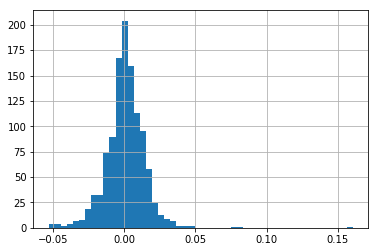

In [28]:
goog['returns'].hist(bins=50)

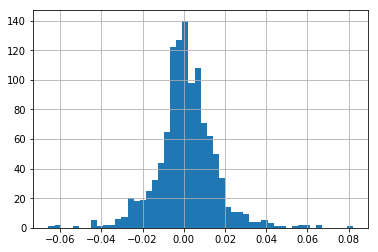

In [29]:
aapl['returns'].hist(bins=50)

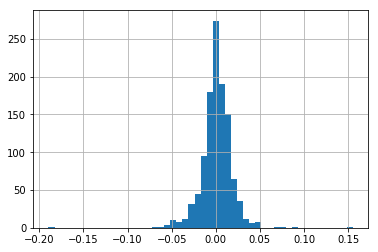

In [30]:
fb['returns'].hist(bins=50)

**將它們疊加在一起。 哪個股票最“波動”？ （根據每日回報的變化判斷，我們將在未來的講座中更詳細地討論波動性。）**

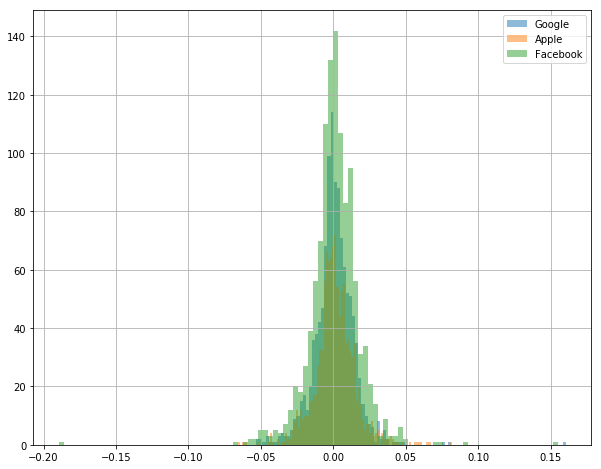

In [31]:
goog['returns'].hist(bins=100,label='Google',figsize=(10,8),alpha=0.5)
aapl['returns'].hist(bins=100,label='Apple',alpha=0.5)
fb['returns'].hist(bins=100,label='Facebook',alpha=0.5)
plt.legend()

** 也嘗試繪製一個KDE作為參考,而不是長條圖。哪個股票的圖最寬？ **

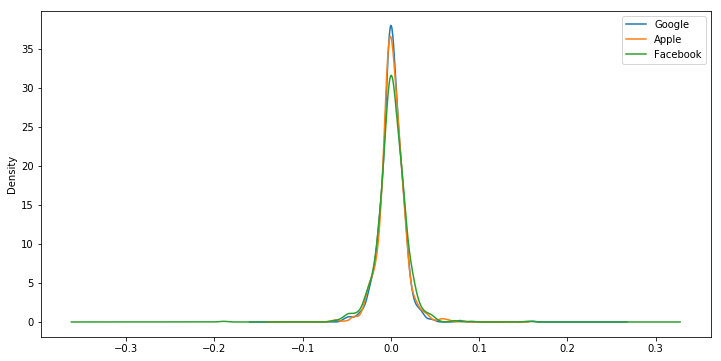

In [65]:
goog['returns'].plot(kind='kde',label='Google',figsize=(12,6))
aapl['returns'].plot(kind='kde',label='Apple')
fb['returns'].plot(kind='kde',label='Facebook')
plt.legend()

** 嘗試創建一些比較回報的箱形圖。 **

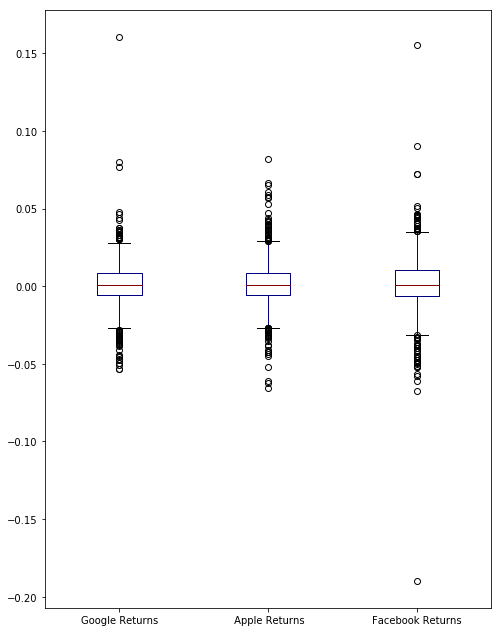

In [66]:
box_df = pd.concat([goog['returns'],aapl['returns'],fb['returns']],axis=1)
box_df.columns = ['Google Returns',' Apple Returns','Facebook Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## 比較股票之間的每日回報

** 創建一個散點矩陣圖，以查看每個股票每日回報之間的相連性。 這有助於回答科技公司的相關問題。 Facebook是否更多地被市場視為綱路公司而不是科技公司？**

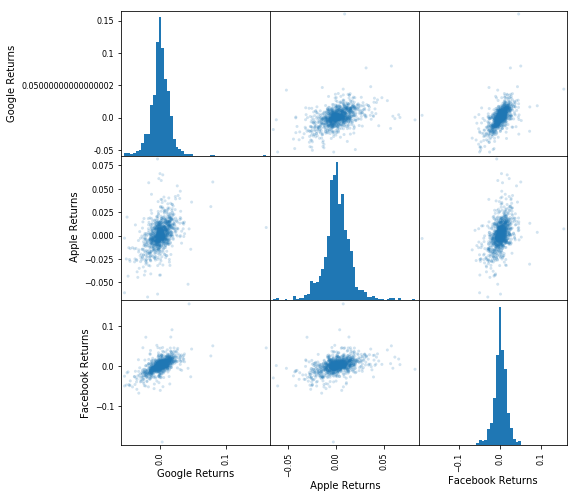

In [67]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** Facebook和Google看起來確實存在某種可能的關係，讓我們在散點圖中將這兩者相互比對，以便更密切地觀察這一點！**

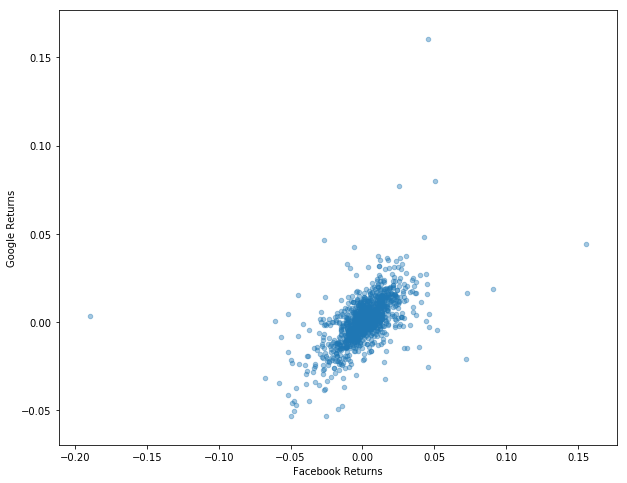

In [68]:
box_df.plot(kind='scatter',x='Facebook Returns',y='Google Returns',alpha=0.4,figsize=(10,8))

____
## 累積每日回報

很好！ 現在我們可以看到哪個股票的日收益率最大（你應該意識到是facebook，我們的股票價格圖應該很明顯）。

隨著每日累積回報，我們試圖回答以下問題：如果我在時間序列開始時在公司投資1美元，今天的價值是多少？ 這不僅僅是當天的股票價格，因為會考慮每日回報。 請記住，我們這裡的簡單計算不會考慮回報股息的股票。 我們來看一些簡單的例子：



例如股票'ABC'正在交易所被積極買賣。 ABC給定日期相對應的以下價格

    日期                         價格
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**每日回報：** 每日回報是股票與前一天相比的盈利/虧損。 （這就是上面剛剛計算的）。 高於1的值表示利潤，同樣地低於1的值表示虧損。 以百分比顯示會更好。 （當顯示為百分比時，如果該值高於0，則該股票會給您帶來利潤，否則虧損）。 因此，對於上面的例子，每日回報將是

    日期                       每日回報                  　　　　　%每日回報
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**累計回報:** 雖然每日回報很有用，但不能讓投資者立即洞悉至今為止的收益，特別是如果股票非常波動。累計回報是相對於當天投資計算的。如果累積回報率高於1，你就獲利，否則虧損。因此，對於上述例子，累計回報如下

    日期                       每日回報                  　　　　　%每日回報
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

累積每日回報的公式：

$ i_i = (1+r_t) * i_{t-1} $

在這裡，我們可以看到，我們只是將之前在 i 的t-1投資乘以 1+ 我們的回報百分比。 Pandas使用cumprod（）方法計算令到非常簡單。 

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** 為每家科技公司的數據框創建累積每日回報列。**

In [69]:
goog['cumulative return'] = (1 + goog['returns']).cumprod()

In [70]:
goog.head()

,open,high,low,close,volume,Total Traded,returns,cumulative return
date,,,,,,,,
2014-04-01,558.710,568.45,558.71,567.16,7932,4.431688e+06,NaN,NaN
2014-04-02,565.106,604.83,562.19,567.00,146697,8.289935e+07,-0.000282,0.999718
2014-04-03,569.850,587.28,564.13,569.74,5087530,2.899129e+09,0.004832,1.004549
2014-04-04,574.650,577.77,543.00,543.14,6377658,3.664921e+09,-0.046688,0.957649
2014-04-07,540.740,548.48,527.15,538.15,4389569,2.373616e+09,-0.009187,0.948850


In [71]:
aapl['cumulative return'] = (1 + aapl['returns']).cumprod()
fb['cumulative return'] = (1 + fb['returns']).cumprod()

** 現在根據時間序列索引繪製累積回報列。 哪一隻股票顯示1美元投資的回報最高？ 哪個顯示最低？**

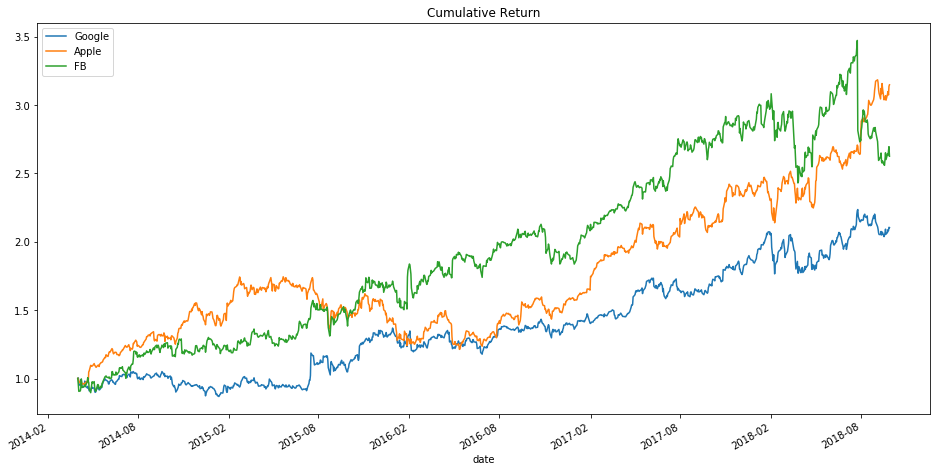

In [72]:
goog['cumulative return'].plot(label='Google',figsize=(16,8),title='Cumulative Return')
aapl['cumulative return'].plot(label='Apple')
fb['cumulative return'].plot(label='FB')
plt.legend()

# 很好！

這些基本的分析就是這樣，結束了本課程的這半部分，側重於學習工具。 課程的後半部分是我們真正深入研究時間序列，定量分析，算法交易等！